# Fuel efficiency data #

Aim: to investigate how the addition of Hydrotreated Vegetable Oil (HVO) to diesel fuel changes fuel efficiency based on 2024 data.

## Importing the data ##

In [18]:
fuelData <- read.csv('fuel.csv')
head(fuelData)

X,REG,Week,HVO,Diesel,CLASS,miles,GB,IE,AT,...,NO,PT,SE,CH,LU,PL,HR,SI,fuel,mpg
1,truck1,2,720.70,0,HGV,1485.3369,1485.3369,0,0,...,0,0,0,0,0,0,0,0,720.70,9.369329
2,truck1,3,587.42,0,HGV,1045.7358,1045.7358,0,0,...,0,0,0,0,0,0,0,0,587.42,8.093032
3,truck1,4,635.69,0,HGV,1442.5705,1442.5705,0,0,...,0,0,0,0,0,0,0,0,635.69,10.316436
4,truck1,5,613.99,0,HGV,1070.3352,1070.3352,0,0,...,0,0,0,0,0,0,0,0,613.99,7.924950
5,truck1,6,455.06,0,HGV,1209.7557,1209.7557,0,0,...,0,0,0,0,0,0,0,0,455.06,12.085567
6,truck1,7,570.16,0,HGV,670.9068,670.9068,0,0,...,0,0,0,0,0,0,0,0,570.16,5.349380


Variable explanation:
- `REG` is an anonymised variable related to vehicle registration number.
- `Week` is the week number in 2024
- `HVO` is Hydrotreated Vegetable Oil (in litres)
- `Diesel` is diesel oil (in litres)
- `CLASS` is a vehicle class: van, rigid truck or HGV
- `miles` is the total miles travelled in the given week
- `fuel` is the sum of both types of oil used
  
The country code variables correspond to miles travelled in each European country.

`mpg` is fuel efficiency in miles per gallon (response variable)

## Exploratory data analysis ##

Visualising the distribution of `mpg`, `HVO`, `Diesel`, `miles`:

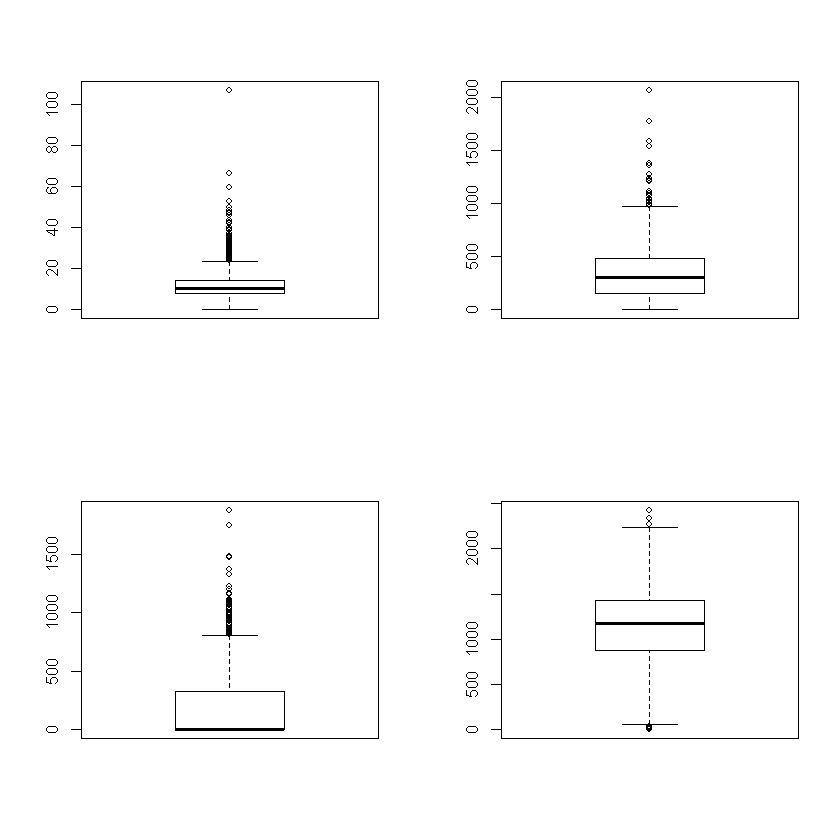

In [19]:
par(mfrow = c(2, 2))
boxplot(fuelData$mpg)
boxplot(fuelData$HVO)
boxplot(fuelData$Diesel)
boxplot(fuelData$miles)

Relationships between:
- `mpg` and `HVO`
- `mpg` and `Diesel`

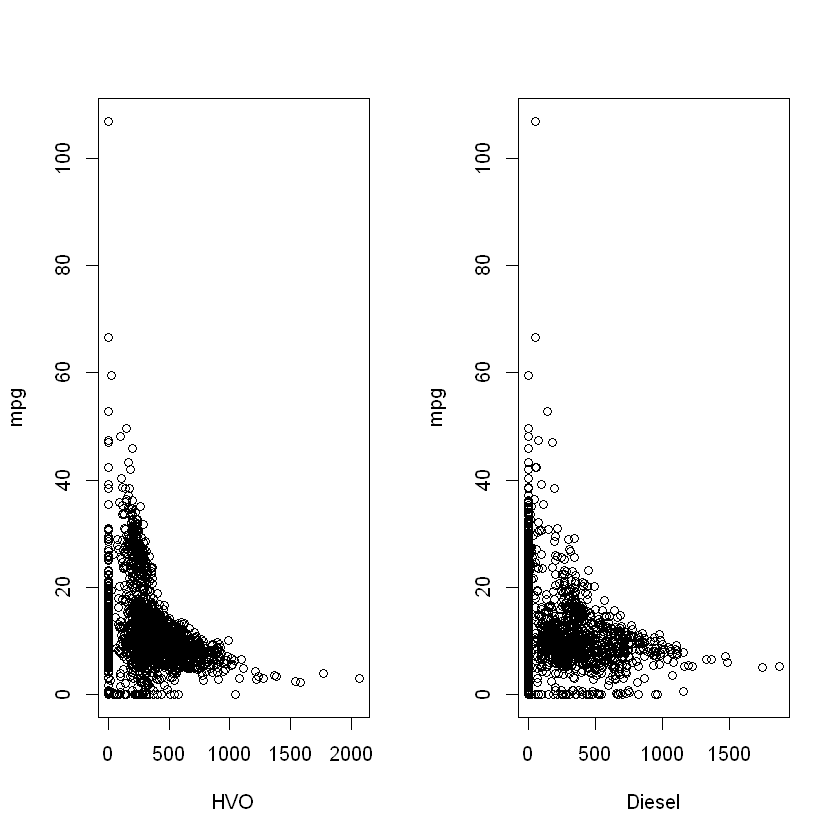

In [20]:
par(mfrow = c(1, 2))
plot(mpg ~ HVO, data = fuelData)
plot(mpg ~ Diesel, data = fuelData)

We are adding a new variable `pHVO`, which is a proportion of HVO in total fuel used:

In [21]:
fuelData$pHVO <- fuelData$HVO / fuelData$fuel

And visualising its relationship to `mpg`:

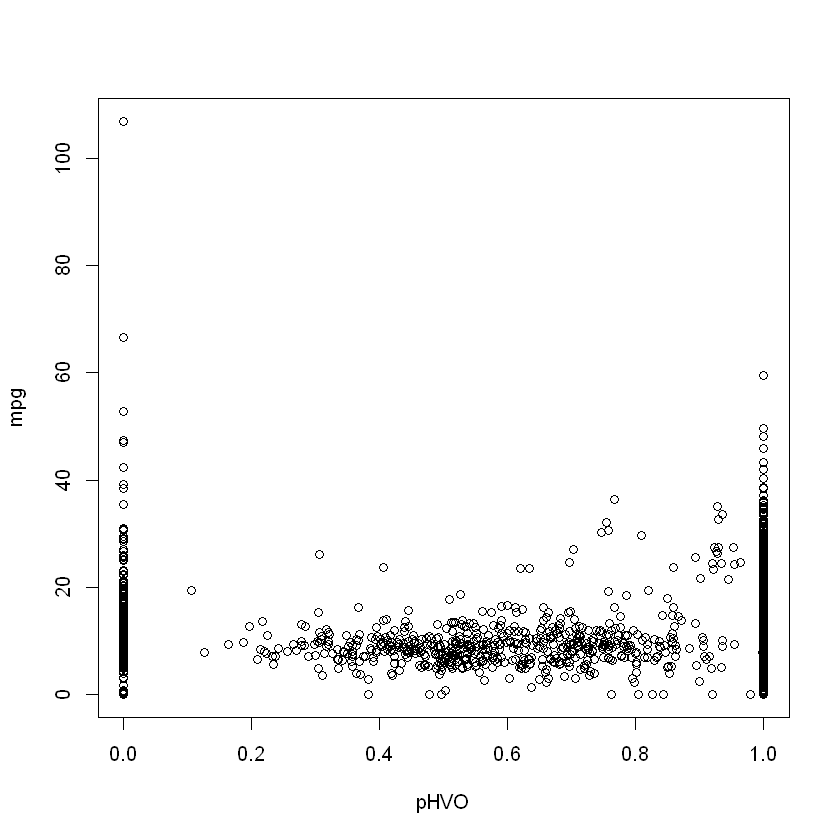

In [22]:
plot(mpg ~ pHVO, data = fuelData)

We are adding a new variable `EU`, which is the number of miles travelled in Europe outside of the UK:

In [30]:
fuelData$EU <- fuelData$miles - fuelData$GB

And visualising its relationship to mpg:

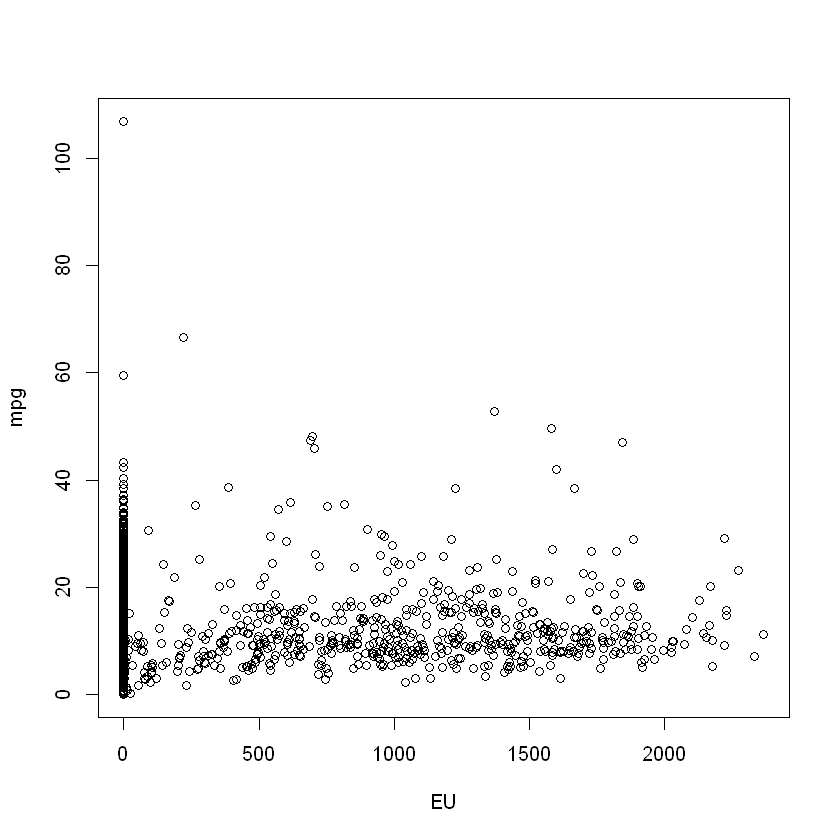

In [31]:
plot(mpg ~ EU, data = fuelData)

## Fitting a linear model ##

In [37]:
# fitting a full linear model w/o interactions
fuelFullModel <- lm(mpg ~ Week + HVO + Diesel + CLASS + miles + GB + EU + fuel + pHVO, data = fuelData)
summary(fuelFullModel)


Call:
lm(formula = mpg ~ Week + HVO + Diesel + CLASS + miles + GB + 
    EU + fuel + pHVO, data = fuelData)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.707  -1.439  -0.857   0.323  85.930 

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.1247905  0.6945695  11.698  < 2e-16 ***
Week         0.0059251  0.0063944   0.927    0.354    
HVO         -0.0152714  0.0006399 -23.864  < 2e-16 ***
Diesel      -0.0210293  0.0007568 -27.786  < 2e-16 ***
CLASSHGV     3.8135861  0.6360474   5.996 2.38e-09 ***
CLASSHIAB    4.1205790  0.7664971   5.376 8.47e-08 ***
CLASSRIGID   3.8333473  0.6873893   5.577 2.77e-08 ***
CLASSVAN    13.1719431  0.7825111  16.833  < 2e-16 ***
miles        0.0098111  0.0003069  31.966  < 2e-16 ***
GB          -0.0013132  0.0002683  -4.895 1.06e-06 ***
EU                  NA         NA      NA       NA    
fuel                NA         NA      NA       NA    
pHVO        -2.9430955  0.

In [33]:
# fitting a null linear model
fuelNullModel <- lm(mpg ~ 1, data = fuelData)

In [38]:
# stepwise regression from the full model
stepFull = step(fuelFullModel, direction = "both", 
     scope = list(lower = fuelNullModel, upper = fuelFullModel))

Start:  AIC=6133.86
mpg ~ Week + HVO + Diesel + CLASS + miles + GB + EU + fuel + 
    pHVO


Step:  AIC=6133.86
mpg ~ Week + HVO + Diesel + CLASS + miles + GB + EU + pHVO


Step:  AIC=6133.86
mpg ~ Week + HVO + Diesel + CLASS + miles + GB + pHVO

         Df Sum of Sq   RSS    AIC
- Week    1      15.5 38097 6132.7
<none>                38081 6133.9
- GB      1     433.9 38515 6155.8
- pHVO    1     497.5 38579 6159.3
- HVO     1   10312.6 48394 6638.5
- CLASS   4   11141.5 49223 6668.4
- Diesel  1   13980.3 52061 6792.9
- miles   1   18503.4 56584 6969.0

Step:  AIC=6132.72
mpg ~ HVO + Diesel + CLASS + miles + GB + pHVO

         Df Sum of Sq   RSS    AIC
<none>                38097 6132.7
+ Week    1      15.5 38081 6133.9
- GB      1     446.9 38543 6155.4
- pHVO    1     493.7 38590 6157.9
- HVO     1   10373.4 48470 6639.8
- CLASS   4   11148.9 49245 6667.4
- Diesel  1   13971.1 52068 6791.2
- miles   1   18573.2 56670 6970.2


In [40]:
# stepwise regression from the null model
stepNull = step(fuelNullModel, direction = "both", 
     scope = list(lower = fuelNullModel, upper = fuelFullModel))

Start:  AIC=8781.29
mpg ~ 1

         Df Sum of Sq    RSS    AIC
+ CLASS   4     60377  74116 7529.6
+ fuel    1     31809 102684 8212.8
+ miles   1     19699 114794 8448.5
+ GB      1     10769 123724 8606.9
+ HVO     1     10203 124290 8616.5
+ Diesel  1      7866 126627 8655.9
+ pHVO    1      1223 133270 8764.0
+ Week    1       217 134276 8779.9
+ EU      1       141 134351 8781.1
<none>                134493 8781.3

Step:  AIC=7529.6
mpg ~ CLASS

         Df Sum of Sq    RSS    AIC
+ fuel    1     12962  61154 7125.2
+ HVO     1      7163  66953 7316.7
+ miles   1      4820  69296 7389.5
+ EU      1      2468  71648 7460.0
+ pHVO    1      1082  73034 7500.5
+ Diesel  1      1021  73095 7502.3
+ Week    1       124  73992 7528.1
<none>                 74116 7529.6
+ GB      1        25  74091 7530.9
- CLASS   4     60377 134493 8781.3

Step:  AIC=7125.21
mpg ~ CLASS + fuel

         Df Sum of Sq    RSS    AIC
+ miles   1     22180  38973 6174.8
+ EU      1      6519  54635 6888.9

No matter the starting model, both stepwise regressions chose the following model:
`mpg ~ CLASS + fuel + miles + GB + HVO + pHVO`

In [41]:
summary(stepFull)


Call:
lm(formula = mpg ~ HVO + Diesel + CLASS + miles + GB + pHVO, 
    data = fuelData)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.658  -1.439  -0.873   0.335  85.817 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.2573882  0.6796456  12.150  < 2e-16 ***
HVO         -0.0152994  0.0006392 -23.935  < 2e-16 ***
Diesel      -0.0210208  0.0007568 -27.778  < 2e-16 ***
CLASSHGV     3.8353435  0.6355925   6.034 1.88e-09 ***
CLASSHIAB    4.1501890  0.7658049   5.419 6.67e-08 ***
CLASSRIGID   3.8607800  0.6867284   5.622 2.14e-08 ***
CLASSVAN    13.1972016  0.7820099  16.876  < 2e-16 ***
miles        0.0098221  0.0003067  32.028  < 2e-16 ***
GB          -0.0013297  0.0002677  -4.968 7.31e-07 ***
pHVO        -2.9308482  0.5612921  -5.222 1.95e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.255 on 2104 degrees of freedom
Multiple R-squared:  0.7167,	Adjusted R-squared:  0.7155 
F-statistic:

The most important factor in fuel efficiency is the vehicle type, with vans being the most efficient due to their smaller size.

Interestingly, an increase in HVO proportion in the total fuel is associated with a decrease in `mpg`. Therefore, the claim of HVO increasing fuel efficiency cannot be proven by this analysis and the re